In [20]:
import pandas as pd
import numpy as np
from scipy.stats import norm


#WYSCOUT
df = pd.read_excel('/Users/marclambertes/Downloads/Total/Eredivisie - 2023-2024.xlsx')
#df['Player'] = df['Player'].str.split('\\', expand=True)[0]
#df = df[df['Position'] =='LW|RW']
#df = df[df['Position'] =='CF']

df['Position'].fillna('Unknown', inplace=True)
# Filter the DataFrame based on the 'Position' column
df = df[df['Position'].str.contains('CMF|DMF')]
#df = df[df['Position'].str.contains('LW|RW')]
#df = df[df['Position'].str.contains('^(?!.*CF|.*LW|.*RW|.*AMF).*CM|.*DM$', regex=True)]
df = df[df['Minutes played'] > 500]
#df = df[df['Age'] <= 25]

#df = df[df['Tier'] =='Tier 2']

#df = df[df['League'] == 'Eredivisie']
#df['League'] = df['League'].replace('2. Frauen-Bundesliga', '2. Frauen-BuLi')
df['Team within selected timeframe'] = df['Team within selected timeframe'].replace('Charleston Southern Buccaneers', 'Charleston Buccaneers')


# DM - Holding
original_metrics = ["Progressive passes per 90", 'Short / medium passes per 90', "Accurate passes, %",
                   "PAdj Sliding tackles", "PAdj Interceptions", "Defensive duels per 90", 
                    "Defensive duels won, %", "Aerial duels won, %", "Progressive runs per 90",
                   "Shots blocked per 90"]

weights = [4, 4, 3, 
           5, 5, 5, 
           0.5, 0.5, 3, 
           1]  

#DM - Deep playmaker
new_metrics = ["Progressive passes per 90", 'Short / medium passes per 90', "Accurate passes, %",
                   "Long passes per 90", "Through passes per 90", "PAdj Interceptions",
               "Deep completions per 90"]

# Adjust the weights for the new metrics as desired
new_weights = [5, 2, 1,
              5, 2, 2,
              2]

#CM - Box-to-box
new_metrics_2 = ["xA per 90", "Progressive passes per 90", "Short / medium passes per 90",
               "Long passes per 90", "Accurate passes, %", "Successful dribbles, %",
              "Progressive runs per 90", "Key passes per 90", "Passes to penalty area per 90",
                "Touches in box per 90", "xG per 90", "PAdj Sliding tackles",
                "PAdj Interceptions", "Defensive duels per 90", "Defensive duels won, %"]

# Adjust the weights for the new metrics as desired
new_weights_2 = [3, 4, 4,
              1, 0.5, 2,
              2, 1, 1,
                2, 3, 2, 
                2, 2, 0.5]

#CM - Ballwinner
new_metrics_3 = ["Progressive passes per 90", "Short / medium passes per 90", "Accurate passes, %",
                 "PAdj Sliding tackles","PAdj Interceptions", "Defensive duels per 90", 
                 "Defensive duels won, %","Aerial duels won, %", "Progressive runs per 90", 
                 "Shots blocked per 90"
                 ]

# Adjust the weights for the new metrics as desired
new_weights_3 = [4, 4, 3,
              5, 5, 5,
              0.5, 0.5, 3,
                1]

#AM - Playmaker
new_metrics_4 = ["xA per 90", "Through passes per 90", "Key passes per 90",
                 "Short / medium passes per 90","Accurate passes, %", "Received passes per 90", 
                 "xG per 90","Touches in box per 90", "Passes to penalty area per 90", 
                 
                 ]

# Adjust the weights for the new metrics as desired
new_weights_4 = [4, 4, 4,
              1, 2, 4,
              1, 1, 1]

#AM - Shadowstriker
new_metrics_5 = ["xG per 90", "Goal conversion, %", "xA per 90",
                 "Touches in box per 90", "Short / medium passes per 90", 
                 "Accurate passes, %", "Successful dribbles, %", "Key passes per 90", 
                 "Through passes per 90", "Received passes per 90", "Passes to penalty area per 90"
                 ]

# Adjust the weights for the new metrics as desired
new_weights_5 = [3, 3, 1,
              2, 3, 0.5,
              1, 2, 2,
                2, 2]


# Calculate the composite score for the original metrics
df["DM Holding"] = np.dot(df[original_metrics], weights)

# Calculate the mean and standard deviation for the composite score of the original metrics
original_mean = df["DM Holding"].mean()
original_std = df["DM Holding"].std()

# Calculate the z-scores for the composite score of the original metrics
df["DM Holding"] = (df["DM Holding"] - original_mean) / original_std

# Map the z-scores of the original metrics to a range of 0 to 100 with two decimal places
df["DM Holding (0-100)"] = (norm.cdf(df["DM Holding"]) * 100).round(2)

# Sort the DataFrame by the z-scores of the original metrics in ascending order
df_original = df.sort_values("DM Holding")

# Save the DataFrame with the z-scores of the original metrics to an Excel file
original_output_filename = "DM Holding.xlsx"
df_original.to_excel(original_output_filename, index=False)

# Calculate the composite score for the new metrics
df["DM Deep playmaker"] = np.dot(df[new_metrics], new_weights)

# Calculate the mean and standard deviation for the composite score of the new metrics
new_mean = df["DM Deep playmaker"].mean()
new_std = df["DM Deep playmaker"].std()

# Calculate the z-scores for the composite score of the new metrics
df["DM Deep playmaker"] = (df["DM Deep playmaker"] - new_mean) / new_std

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["DM Deep playmaker (0-100)"] = (norm.cdf(df["DM Deep playmaker"]) * 100).round(2)

# Sort the DataFrame by the z-scores of the new metrics in ascending order
df_new = df.sort_values("DM Deep playmaker")

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["DM Deep playmaker (0-100)"] = (norm.cdf(df["DM Deep playmaker"]) * 100).round(2)

# Calculate the composite score for the new metrics
df["CM Box to box"] = np.dot(df[new_metrics_2], new_weights_2)

# Calculate the mean and standard deviation for the composite score of the new metrics
new_mean = df["CM Box to box"].mean()
new_std = df["CM Box to box"].std()

# Calculate the z-scores for the composite score of the new metrics
df["CM Box to box"] = (df["CM Box to box"] - new_mean) / new_std

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["CM Box to box (0-100)"] = (norm.cdf(df["CM Box to box"]) * 100).round(2)

# Sort the DataFrame by the z-scores of the new metrics in ascending order
df_new1 = df.sort_values("CM Box to box")

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["CM Box to box (0-100)"] = (norm.cdf(df["CM Box to box"]) * 100).round(2)

# Calculate the composite score for the new metrics
df["CM Ballwinner"] = np.dot(df[new_metrics_3], new_weights_3)

# Calculate the mean and standard deviation for the composite score of the new metrics
new_mean = df["CM Ballwinner"].mean()
new_std = df["CM Ballwinner"].std()

# Calculate the z-scores for the composite score of the new metrics
df["CM Ballwinner"] = (df["CM Ballwinner"] - new_mean) / new_std

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["CM Ballwinner (0-100)"] = (norm.cdf(df["CM Ballwinner"]) * 100).round(2)

# Sort the DataFrame by the z-scores of the new metrics in ascending order
df_new2 = df.sort_values("CM Ballwinner")

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["CM Ballwinner (0-100)"] = (norm.cdf(df["CM Ballwinner"]) * 100).round(2)

# Calculate the composite score for the new metrics
df["AM playmaker"] = np.dot(df[new_metrics_4], new_weights_4)

# Calculate the mean and standard deviation for the composite score of the new metrics
new_mean = df["AM playmaker"].mean()
new_std = df["AM playmaker"].std()

# Calculate the z-scores for the composite score of the new metrics
df["AM playmaker"] = (df["AM playmaker"] - new_mean) / new_std

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["AM playmaker (0-100)"] = (norm.cdf(df["AM playmaker"]) * 100).round(2)

# Sort the DataFrame by the z-scores of the new metrics in ascending order
df_new1 = df.sort_values("AM playmaker")

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["AM playmaker (0-100)"] = (norm.cdf(df["AM playmaker"]) * 100).round(2)

# Calculate the composite score for the new metrics
df["AM Shadowstriker"] = np.dot(df[new_metrics_5], new_weights_5)

# Calculate the mean and standard deviation for the composite score of the new metrics
new_mean = df["AM Shadowstriker"].mean()
new_std = df["AM Shadowstriker"].std()

# Calculate the z-scores for the composite score of the new metrics
df["AM Shadowstriker"] = (df["AM Shadowstriker"] - new_mean) / new_std

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["AM Shadowstriker (0-100)"] = (norm.cdf(df["AM Shadowstriker"]) * 100).round(2)

# Sort the DataFrame by the z-scores of the new metrics in ascending order
df_new2 = df.sort_values("AM Shadowstriker")

# Map the z-scores of the new metrics to a range of 0 to 100 with two decimal places
df["AM Shadowstriker (0-100)"] = (norm.cdf(df["AM Shadowstriker"]) * 100).round(2)



# Save both sets of z-scores to the same Excel file in the same sheet
output_filename = "z_scores_combined.xlsx"
with pd.ExcelWriter(output_filename) as writer:
    df.to_excel(writer, sheet_name="Z-Scores", index=False)

# Print the list of player names, squads, competitions, and the z-scores for both sets of metrics
print("Player Z-Scores (0-100):")
print(df[["Player", "Age", "Team within selected timeframe", "DM Holding (0-100)", "DM Deep playmaker (0-100)", "CM Box to box (0-100)", "CM Ballwinner (0-100)",
       "AM playmaker (0-100)", "AM Shadowstriker (0-100)"]])





Player Z-Scores (0-100):
                   Player   Age Team within selected timeframe  \
14     B. De Keersmaecker  23.0                       Heracles   
26         P. Koopmeiners  23.0                    Almere City   
27              D. Mirani  27.0                       Volendam   
28                J. Baas  21.0                      Excelsior   
30           Deroy Duarte  24.0                Fortuna Sittard   
..                    ...   ...                            ...   
224  D. Sanches Fernandes  22.0                      Excelsior   
229          J. Toornstra  34.0                        Utrecht   
232        M. Hoedemakers  25.0                            NEC   
251           E. Llansana  22.0                Go Ahead Eagles   
253           R. Zerrouki  25.0                      Feyenoord   

     DM Holding (0-100)  DM Deep playmaker (0-100)  CM Box to box (0-100)  \
14                62.19                      46.10                  58.09   
26                59.03     

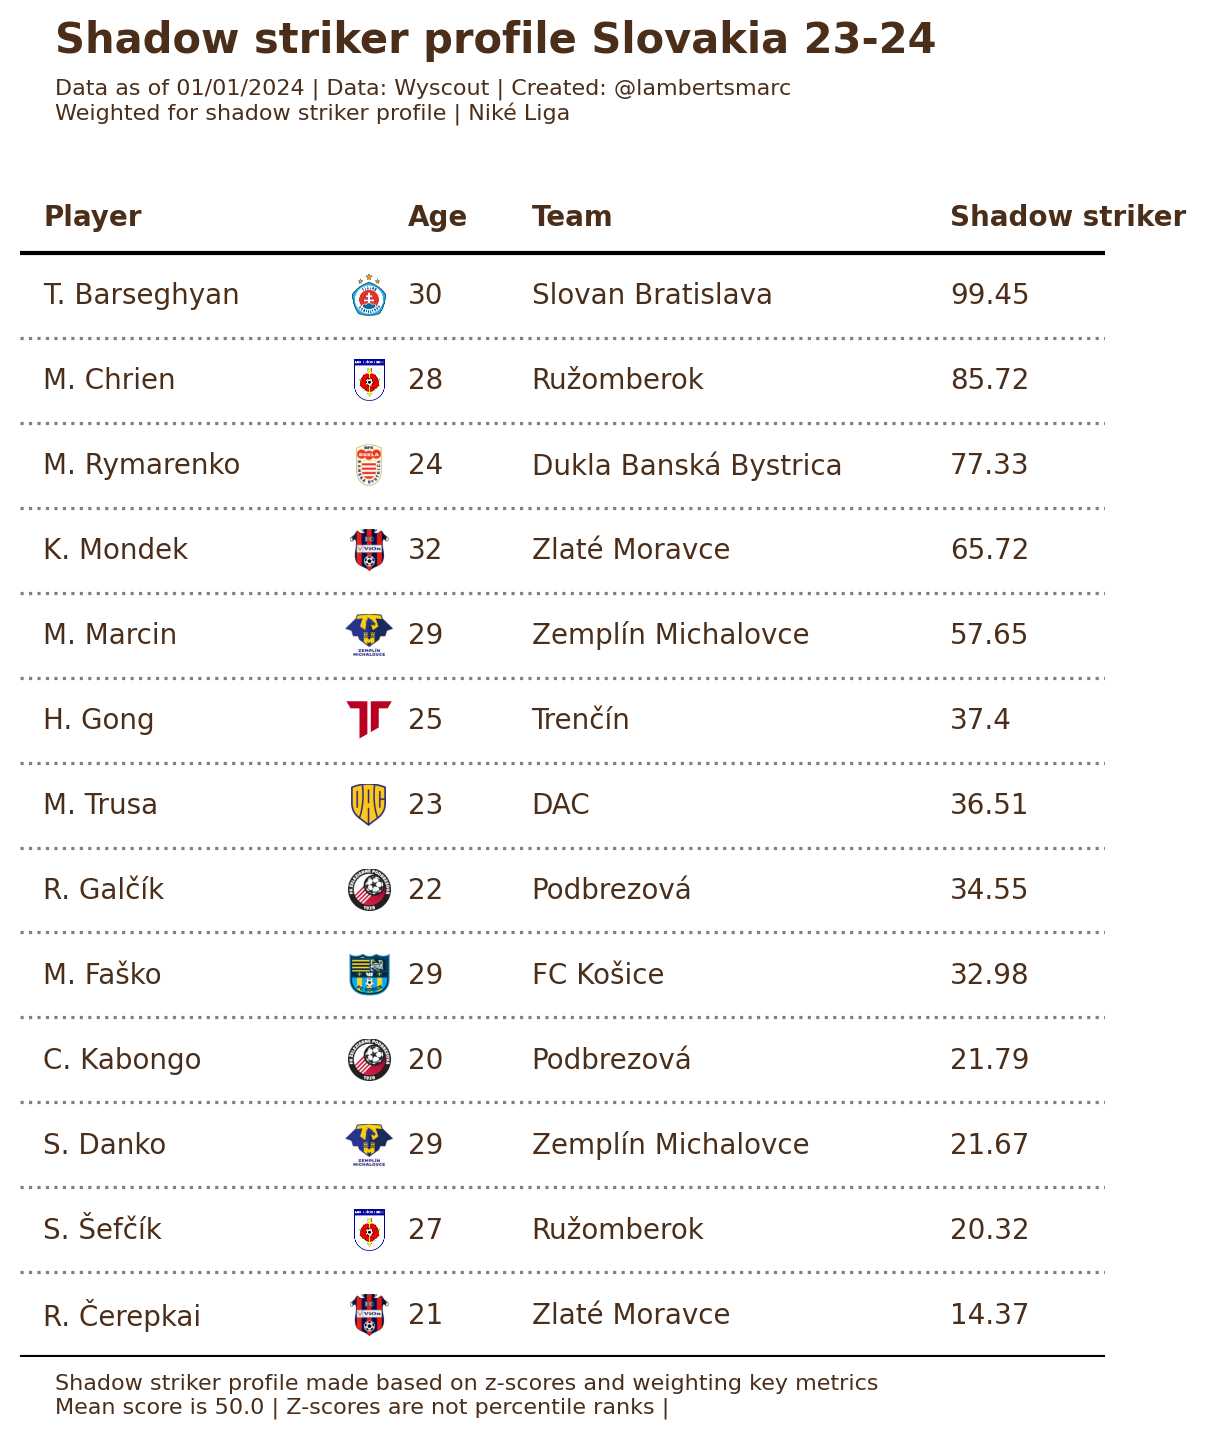

In [5]:
### df = pd.read_excel('z_scores_combined.xlsx')
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
#df = df[df['Team within selected timeframe'] =='Chelsea']

# Assuming you already have a DataFrame named 'df'

# List of teams to exclude
#excluded_teams = ['Club Brugge', 'Antwerp', 'Gent', 'Genk', 'Union Saint-Gilloise', 'Anderlecht']

# Use the .loc method to filter out rows with excluded teams
#df = df[~df['Team within selected timeframe'].isin(excluded_teams)]


df["Playmaker"] = df["AM playmaker (0-100)"] 
df["Shadow striker"] = df["AM Shadowstriker (0-100)"] 


#df["League"] = df["Comp"] 
df["Team"] = df["Team within selected timeframe"] 

def ax_logo(team, ax,):
    path = '/Users/marclambertes/Downloads/Images'
    club_icon = Image.open('%s/%s.png' %(path,team))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

indexdf = df.sort_values(by=['Shadow striker'],ascending=False).head(15)[['Player', 'Age', 'Team', 'Shadow striker']].reset_index(drop=True)
indexdf_short=indexdf[::-1]

fig = plt.figure(figsize=(7,8), dpi=200)
ax = plt.subplot()

ncols = len(indexdf_short.columns.tolist())+1
nrows = indexdf_short.shape[0]

ax.set_xlim(0, ncols + 2)
ax.set_ylim(0, nrows + 1.5)

# lgs = ['J1', 'J2', 'Ekstraklasa', 'J3']
# if lg in lgs:
positions = [0.15, 2.5, 3.3, 6]
# else:
#     positions = [0.25, 2.25, 3.75, 4.5, 5.25]
columns = indexdf_short.columns.tolist()

# Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if 'xG per 90' in column:
            text_label = f'{indexdf_short[column].iloc[i]:,.2f}'
            weight = 'regular'
        else:
            text_label = f'{indexdf_short[column].iloc[i]}'
            weight = 'regular'
        ax.annotate(
            xy=(positions[j], i + .5),
            text = text_label,
            ha='left',
            va='center', color='#4A2E19',
            weight=weight
        )

# Add column names
column_names = columns
for index, c in enumerate(column_names):
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha='left',
            va='bottom',
            weight='bold', color='#4A2E19'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.set_axis_off()

DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.0, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(indexdf_short['Team'].iloc[x], flag_ax,)

fig.text(
    x=0.15, y=.92,
    s='Shadow striker profile Slovakia 23-24',
    ha='left',
    va='bottom',
    weight='bold',
    size=15, color='#4A2E19'
)
fig.text(
    x=0.15, y=.91,
    s='Data as of 01/01/2024 | Data: Wyscout | Created: @lambertsmarc\nWeighted for shadow striker profile | Niké Liga',
    ha='left',
    va='top',
    weight='regular',
    size=8, color='#4A2E19'
)
fig.text(
    x=0.15, y=.10,
    s='Shadow striker profile made based on z-scores and weighting key metrics\nMean score is 50.0 | Z-scores are not percentile ranks |',
    ha='left',
    va='top',
    weight='regular',
    size=8, color='#4A2E19'
)


plt.savefig('Niké Liga striker - shadow striker.png',dpi=750,bbox_inches = 'tight', facecolor='white')

#output_filename = "CF Dutch Tweede Divisie 23-24.pdf"
#plt.savefig(output_filename, format="pdf")

    


In [9]:
import numpy as np

print(np.__version__)

1.24.2


/var/folders/68/mhmqcpdn52943pyql2n4wj440000gn/T/ipykernel_61178/2296646414.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.8])  # Adjust layout to avoid title overlap


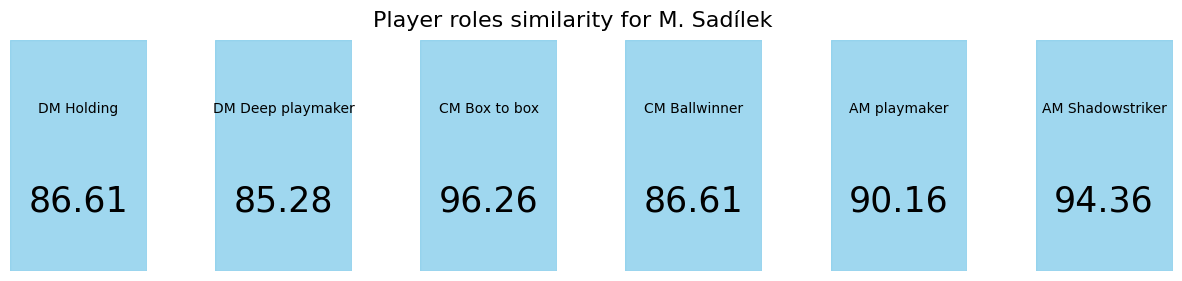

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is loaded from Excel, replace 'your_file.xlsx' with your actual file path.
df = pd.read_excel('z_scores_combined.xlsx')

# Replace 'desired_player_name' with the name of the player you are looking for.
player_name = 'M. Sadílek'

# Filter the DataFrame for the specific player
player_df = df[df['Player'] == player_name]

# Extract the values for the desired columns
values = player_df[['DM Holding (0-100)', 'DM Deep playmaker (0-100)', 'CM Box to box (0-100)',
                    'CM Ballwinner (0-100)', 'AM playmaker (0-100)', 'AM Shadowstriker (0-100)']].values.flatten()

# Specify the desired column names as titles
column_names = ['DM Holding', 'DM Deep playmaker', 'CM Box to box', 'CM Ballwinner', 'AM playmaker', 'AM Shadowstriker']

# Create a 1x6 grid for the subplots
fig, axes = plt.subplots(1, 6, figsize=(15, 3), gridspec_kw={'wspace': 0.5})
fig.suptitle(f'Player roles similarity for {player_name}', fontsize=16)

# Plot each skill in a separate square with values as titles
for ax, value, col_name in zip(axes, values, column_names):
    ax.axis('off')  # Turn off the axes
    ax.add_patch(plt.Rectangle((0, 0), 1, 1, color='skyblue', alpha=0.8))
    ax.text(0.5, 0.7, col_name, va='center', ha='center', color='black', fontsize=10)
    ax.text(0.5, 0.3, f'{value:.2f}', va='center', ha='center', color='black', fontsize=25)

plt.tight_layout(rect=[0, 0, 1, 0.8])  # Adjust layout to avoid title overlap

# Save the plot to a PNG file
plt.savefig('skills_distribution.png', dpi=300)
plt.show()
